# 서포트 벡터 머신
서포트 벡터 머신(SVM)은 매우 강력하고 선형이나 비선형 분류, 회귀, 이상치 탐색에도 사용할 수 있는 다목적 머신러닝 모델이다.
머신러닝에서 가장 인기 있는 모델에 속하고 머신러닝에 관심 있는 사람이라면 반드시 알고 있어야 하는 모델이다.
SVM은 특히 복잡한 분류 문제에 잘 들어맞으며 작거나 중간 크기의 데이터셋에 적합하다.
이번 장에서는 SVM의 핵심 개념을 설명하고 사용 방법과 작동 원리를 살펴보자.

## 선형 SVM 분류
SVM의 기본 아이디어는 그림으로 설명하는 것이 가장 좋다.
다음은 4장에서 소개한 붓꽃 데이터셋의 일부를 나타낸 것이다.
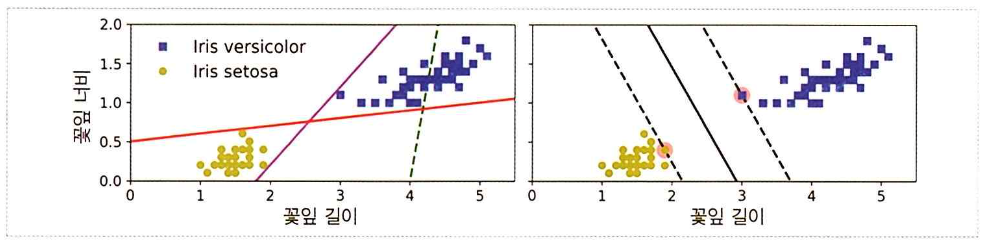
두 클래스가 직선으로 확실히 잘 나뉘어 있다.
왼쪽 그래프에 세 개의 선형 분류기에서 만들어진 결정 경계가 보인다.
4장에서 배운 선형 분류기와 다른 점은 왼쪽 그래프의 결정 경계같은 경우 결정 경계가 샘플에 너무 가까워 새로운 샘플에 대해서는 아마 
잘 작동하지 못할 것이다.
오른쪽 그래프에 있는 실선은 바로 SVM 분류기의 결정 경계이다. 
이 직선은 두 개의 클래스를 나누고 있을 뿐만 아니라, 제일 가까운 훈련 샘플로부터 가능한 한 멀리 떨어져 있다.
SVM 분류기를 클래스 사이에 가장 폭이 넓은 도로를 찾는 것으로 생각할 수 있다.
그래서 라지 마진 분류(large margin classification)라고 한다.

<b>도로 바깥쪽에 훈련 샘플을 더 추가해도 결정 경계에는 전혀 영향을 미치지 않는다.</b>
도로에 위치한 샘플에 의해 전적으로 결정된다.
이런 샘플을 서포트 벡터(Support vector)라고 한다.

## 소프트 마진 분류
모든 샘플이 도로 바깥쪽에 올바르게 분류되어 있다면, 이를 하드 마진 분류(hard margin classification)라고 한다.
하드 마진 분류에는 두 가지 문제점이 있다.
데이터가 선형적으로 구분될 수 있어야 제대로 동작하며, 
이상치에 민감하다.
이런 문제를 피하려면 좀 더 유연한 모델이 필요하다.
도로의 폭을 가능한 한 넓게 유지하는 것과 마진 오류(margin violation) - 샘플이 도로 중간이나 심지어 반대쪽에 있는 경우 - 사이에 적절한 균형을 잡아야 한다.
이를 소프트 마진 분류(soft margin classification)라고 한다.
사이킷런의 SVM 모델을 만들 때 여러 하이퍼파라미터를 지정할 수 있다.
C는 이런 하이퍼파라미터 중에 하나이다.

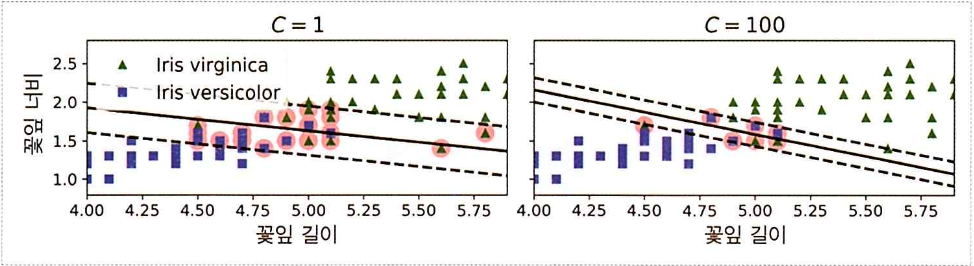
이를 낮게 설정하면 왼쪽 그림과 같은 모델을 만든다. (SVM 모델이 과대적합이라면 C를 감소시켜 모델을 규제할 수 있다.)
높게 설정하면 오른쪽과 같은 모델을 얻는다.
마진 오류는 당연히 나쁘므로 일반적으로 적은 것이 더 좋다. 하지만 위의 경우 왼쪽 모델에 마진 오류가 많지만 일반화에 있어서는
더 잘 될 것 같다.
다음 사이킷런 코드는 붓꽃 데이터셋을 적재하고, 특성 스케일을 변경하고, Iris-Virginia 품종을 감지하기 위해 선형 SVM 모델을 
훈련시킨다. 

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()), # 특성 스케일 변경
    ("linear_svc", LinearSVC(C=1, loss="hinge")), # LinearSVC로 svm 훈련
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [2]:
svm_clf.predict([[5.5, 1.7]]) # 꽃잎 길이, 꽃잎 너비

array([1.])

LinearSVC 클래스를 대신 선형 커널을 사용하는 SVC 클래스로 대체할 수 있다.
SVC 모델을 만들 때 SVC(kernel="linear", C=1)라고 쓴다.
또 다른 방법은 SGDClassifier(loss=hinge", alpha=1/(m*C))와 같은 SGDClassifier 모델을 사용하는 것이다.
이는 SVM 선형 분류기를 훈련시키기 위해 일반적인 확률적 경사 하강법을 적용한다.
LinearSVC만큼 빠르게 수렴하지는 않지만 데이터셋이 아주 커서 메모리에 적재할 수 없거나, 온라인 학습으로 분류 문제를 다룰 떄 유용하다.

## 비선형 SVM 분류
선형 SVM 분류기가 효율적이고 많은 경우에 아주 잘 작동하지만, 선형적으로 분류할 수 없는 데이터셋이 많다.
비선형 데이터셋을 다루는 한 가지 방법은 4장에서처럼 다항 특성과 같은 특성을 더 추가하는 것이다.
이렇게 하면 선형적으로 구분되는 데이터셋이 만들어질 수 있다.
사이킷런을 사용하여 이를 구현하려면 우리가 4장 다항 회귀 파트에서 소개한 PolynomialFeatures 변환기와 StandardScaler,
LinearSVC를 연결하여 Pipeline을 만든다. 이를 moons 데이터셋(사이킷런의 make_moons 함수를 시용해서 만든 두 개의 반달 모양 데이터셋이다)에 적용해보겠다. 이 데이터셋은 마주보는 두 개의 반원 모양으로 데이터 포인트가 놓여 있는 이진 분류를 위한 작은 데이터셋이다(태극모양처럼 되어있다!) make_moons() 함수를 사용해 이 데이터셋을 만들 수 있다.

In [4]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15)

polynomial_svm_clf = Pipeline([
  ("poly_features", PolynomialFeatures(degree=3)),
  ("scaler", StandardScaler()), # 정규화
  ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

## 다항식 커널
다항식 특성을 추가하는 것은 간단하고 모든 머신러닝 알고리즘에서 잘 작동한다.
하지만 낮은 차수의 다항식은 매우 복잡한 데이터셋을 잘 표현하지 못하고 높은 차수의 다항식은 굉장히 많은 특성을 추가하므로 모델을 느리게
만든다. 
다행히 SVM을 사용할 땐 <b>커널 트릭</b>이라는 수학적 기교를 통해 이를 해소할 수 있다.
커널 트릭은 실제로는 특성을 추가하지 않으면서 다항식 특성을 많이 추가한 것과 같은 결과를 얻을 수 있다.
사실 어떤 특성도 추가하지 않기 때문에 엄청난 수의 특성 조합이 생기지 않는다.
이 기법은 이미 SVC 파이썬 클래스에 구현되어 있다.
moons 데이터셋으로 테스트해보자.

In [8]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

위의 코드는 3차 다항식 커널을 사용해 SVM 분류기를 훈련시킨다. 모델이 만약 과대적합이라면 다항식의 차수를 줄여야 한다.
반대로 과소적합이라면 차수를 늘려야 한다. 위의 코드에서 매개변수 coef0는 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을지
조절한다.

## 유사도 특성
비선형 특성을 다루는 또 다른 기법은 각 샘플이 특정 <b>랜드마크</b>와 얼마나 닮았는지 측정하는 <b>유사도 함수</b>로 계산한 특성을
추가하는 것이다. <br>

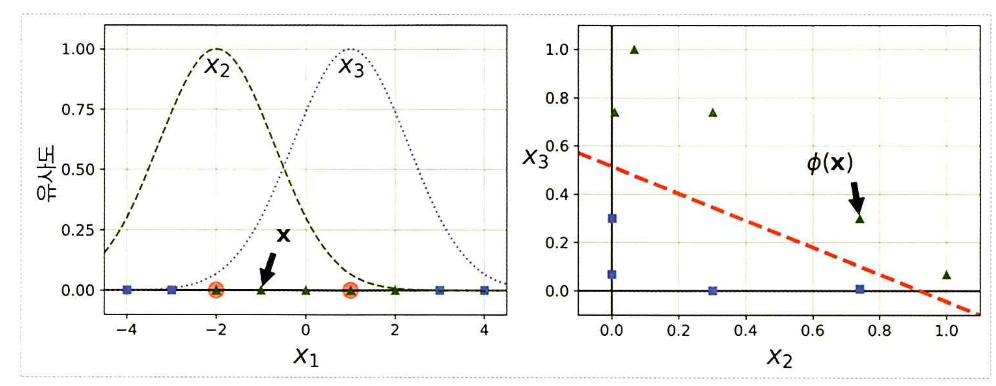
에를 들어 앞에서 본 1차원 데이터셋에 두 개의 랜드마크 x1=-2와 x1=1를 추가한다
그리고 y=0.3인 가우시안 <b>방사 기저 함수(RBF)</b>를 유사도 함수로 정의하겠다.

exp(-r|x-l|^2)
* 가우시아 방사 기저 함수 RBF
  이 함수의 값은 랜드마크에서 아주 멀리 떨어진 경우 - 0 부터 랜드마크와 같은 위치일 경우 - 1 까지 변화하며 종 모양으로 나타난다.

그럼 이제 새로운 특성을 만들 준비가 됐다.
예를 들어 x1 = -1 샘플을 살펴본다.
이 샘플은 첫 번째 랜드마크인 -2에서 1만큼 떨어져 있고, 두 번째 랜드마크인 1까지 2만큼 떨어져 있다.
그러므로 새로 만든 특성은 x2 = exp(-0.3 * 1^2) = 0.74와 x3 = exp(-0.3 * 2^2) = 0.30이다.
위의 그림에서 오른쪽 그래프는 그렇게 모든 샘플에 대해 변환된 데이터셋을 보여준다.
그림에서 볼 수 있듯이 이제 선형적으로 구분이 가능하다!

## 가우시안 RBF 커널
다항 특성 방식과 마찬가지로 유사도 특성 방식도 머신러닝 알고리즘에 유용하게 사용될 수 있다.
추가 특성을 모두 계산하려면 연산 비용이 많이 드는데 특히 훈련 세트가 클 경우 더 그렇다.
여기에서 커널 트릭이 한 번 더 SVM의 마법을 만든다.
유사도 특성을 많이 추가하는 것과 같은 비슷한 결과를 얻을 수 있다.
가우시안 RBF 커널을 사용한 SVC 모델을 시도해보겠다.

In [10]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

gamma를 증가시키면 종 모양 그래프가 좁아져서 각 샘플의 영향 범위가 작아진다.
결정 경계가 조금 더 불규칙해지고 각 샘플을 따라 구불구불하게 휘어진다.
반대로 작은 gamma 값은 넓은 종 모양 그래프를 만들며 샘플이 넓은 범위에 걸쳐 영향을 주므로 결정 경계가 더 부드러워진다.
결국 하이퍼파라미터 gamma가 규제의 역할을 한다.
모델이 과대적합일 경우엔 감소시켜야 하고 과소적합일 경우엔 증가시켜야 한다. (이전에 나왔던 하이퍼파라미터 C와 비슷하다!)

RBF 커널 이외에도 다른 커널도 있지만 거의 사용되지 않는다. 어떤 커널은 특정 데이터 구조에 특화되어 있다. 문자열 커널이 가끔 텍스트 문서나 DNA 서열을 분류할 때 사용된다.

## 계산 복잡도
LinearSVC 파이썬 클래스는 선형 SVM을 위한 최적화된 알고리즘을 구현한 liblinear 라이브러리를 기반으로 한다.
이 라이브러리는 커널 트릭을 지원하지 않지만 훈련 샘플과 특성 수에 거의 선형적으로 늘어난다.
이 알고리즘의 훈련 시간 복잡도는 대략 O(mxn) 정도이다.

SVC()는 커널 트릭 알고리즘을 구현한 libsvm 라이브러리를 기반으로 한다. 훈련의 시간 복잡도는 보통 
O(m^2xn)과 O(m^3xn) 사이이다. 딱 봐도 훈련 샘플 수가 커지면 엄청나게 느려질 것이 분명하다.
따라서 이 SVC()는 복잡하지만 작거나 중간 규모의 훈련 세트에 이 알고리즘이 잘 맞는다.

## SVM 회귀
앞서 이야기한 것처럼 SVM 알고리즘은 다목적으로 사용할 수 있다.
선형, 비선형 분류뿐만 아니라 선형, 비선형 회귀에도 사용할 수 있다.
SVM을 분류가 아니라 회귀에 적용하는 방법은 목표를 반대로 하는 것이다.
일정한 마진 오류 안에서 두 클래스 간의 도로 폭이 가능한 최대가 되도록 하는 대신, 
SVM 회귀는 제한된 마진 오류 안에서 도로 안에 가능한 한 많은 샘플이 들어가도록 학습한다.
도로의 폭은 하이퍼파라미터 r"$\epsilon$"으로 조절한다.
다음 그림은 무작위로 생성한 선형 데이터셋에 훈련시킨 두 개의 선형 SVM 회귀 모델을 보여준다.
하나는 마진을 크게 하고(epsilon=1.5) 다른 하나는 마진을 작게 하여(epsilon=0.5) 만들었다.
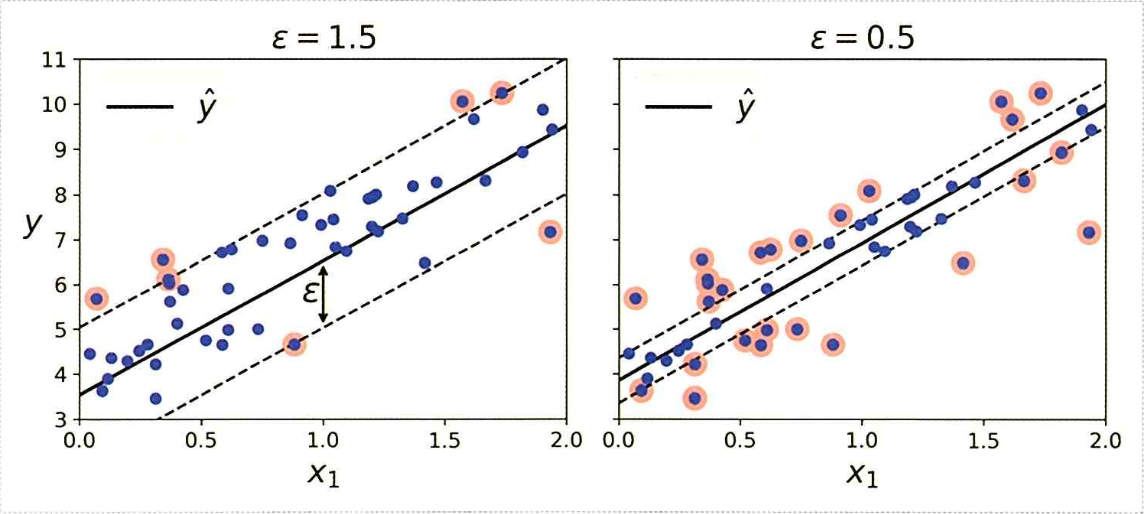
마진 안에서는 훈련 샘플이 추가되어도 모델의 예측에는 영향이 없다.
그래서 이 모델을 입실론에 민감하지 않다고 말한다.
사이킷런의 LinearSVR을 사용해 선형 SVM 회귀를 적용해보자.

In [11]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

비선형 회귀 작업을 처리하려면 커널 SVM 모델을 사용한다. 
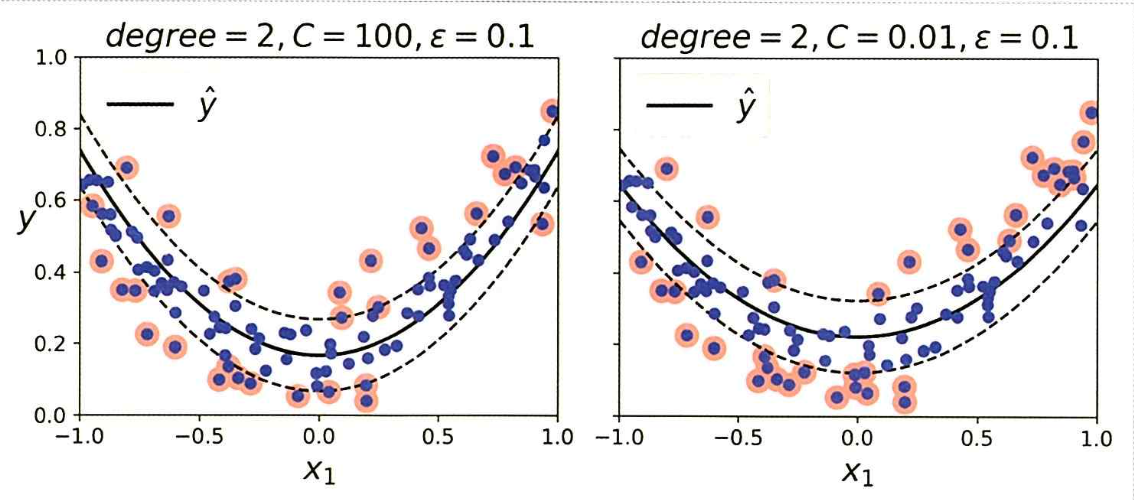
<br>
다음 그림은 임의의 2차방정식 형태의 훈련 세트에 2차 다항 커널을
사용한 SVM 회귀를 보여준다. 왼쪽 그래프는 규제가 거의 없고(즉 C가 크다), 오른쪽 그래프는 규제가 훨씬 많다(즉 C가 작다).
다음 코드는 커널 트릭을 제공하는 사이킷런의 SVR을 사용해 왼쪽 그래프에 해당하는 모델을 만든다.

In [12]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

SVR은 SVC의 회귀 버전이고 LinearSVR은 LinearSVC의 회귀 버전이다.
LinearSVR은 LinearSVC처럼 필요한 시간이 훈련 세트의 크기에 비례해서 선형적으로 늘어난다.
반면 SVR은 SVC처럼 훈련 세트가 커지면 훨씬 느려진다.

## SVM 이론
SVM의 예측은 어떻게 이뤄지는지, 그리고 SVM의 훈련 알고리즘이 어떻게 작동하는지 알아보자.
먼저 선형 SVM 분류기부터 시작하겠다.
일단 여기서는 편향을 b라고 하고 가중치 벡터를 W라고 하겠다.
따라서 입력 특성 벡터에 편향을 위한 특성이 추가되지 않는다.

### 결정 함수와 예측
선형 SVM 분류기 모델은 단순히 결정 함수 W^T*X+b를 계산해서 새로운 샘플 X의 클래스를 예측한다.
결과값이 0보다 크면 예측된 클래스 y는 양성 클래스가 된다.
그렇지 않으면 음성 클래스가 된다.
앞에서 나온 꽃잎의 너비와 길이라는 2개의 특성의 데이터셋에 대한 결정 함수는 2차원 평면으로 나타날 것이다(특성의 2개니까 당연)
결정 경계는 결정 함수의 값이 0인 점들로 이루어져 있다.
이는 두 평면의 교차점(결정 함수와 기존 데이터 샘플들이 놓여진 평면)으로 직선이다.

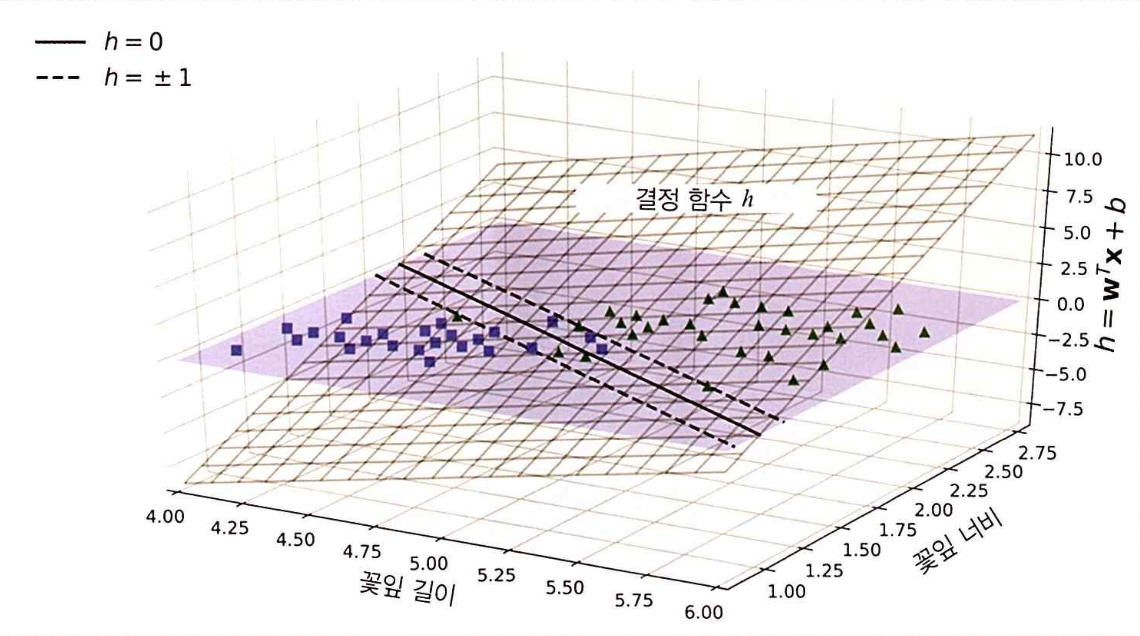

점선은 결정 함수의 값이 1 또는 -1인 점들을 나타낸다.
이 선분은 결정 경계에 나란하고 일정한 거리만큼 떨어져서 마진을 형성하고 있다.
선형 SVM 분류기를 훈련한다는 것은 마진 오류를 하나도 발생시키지 않거나(하드 마진)
제한적인 마진 오류를 가지면서(소프트 마진) 가능한 한 마진을 크게 하는 W와 b를 찾는 것이다.


## 목적 함수
결국 결정함수는 h=W^T*X+b이므로 결정 함수의 기울기를 생각해보면 이는 가중치 벡터의 norm |W|과 같다.
이 기울기를 2로 나누면 결정 함수의 값이 +,-1이 되는 점들이 2배만큼 더 멀어진다(직관적으로도 2차원인 결정 함수가 더 누으면 평면과의 교선 주변이 더 멀어진다!)
즉 기울기를 2로 나누는 것은 마진에 2를 곱하는 것과 같다.
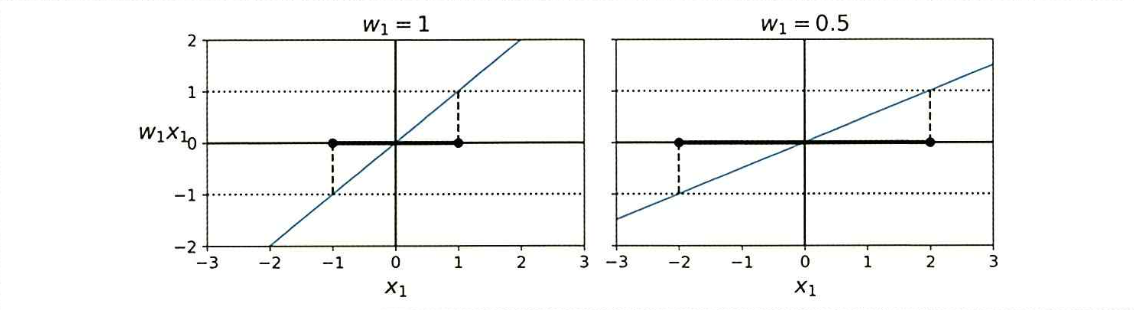
위와 같이 2차원으로 시각화하면 이해하기 더 쉽다.
가중치 벡터 W가 작을수록 마진은 더 커진다!
이 말은 마진을 크게 하려면 |W|를 최소화해야 한다는 것이다. 
하드 마진 : 즉 마진 오류를 하나도 만들지 않으려면...
(L-2 norm 최소화 but 루트 귀찮아서 벗기려고 제곱, 1/2로 곱한 것은 미분했을때 자연스럽게 없어지도록!
[스크린샷 2024-07-02 오후 2.15.47.png](attachment:e6a2372d-4f81-4525-b55f-de7ec9f192b0.png))
 그래서 이녀석을 줄이는 것이 하드 마진 목적 함수의 첫번째 목적이다.
 이때 조건이 있는데
 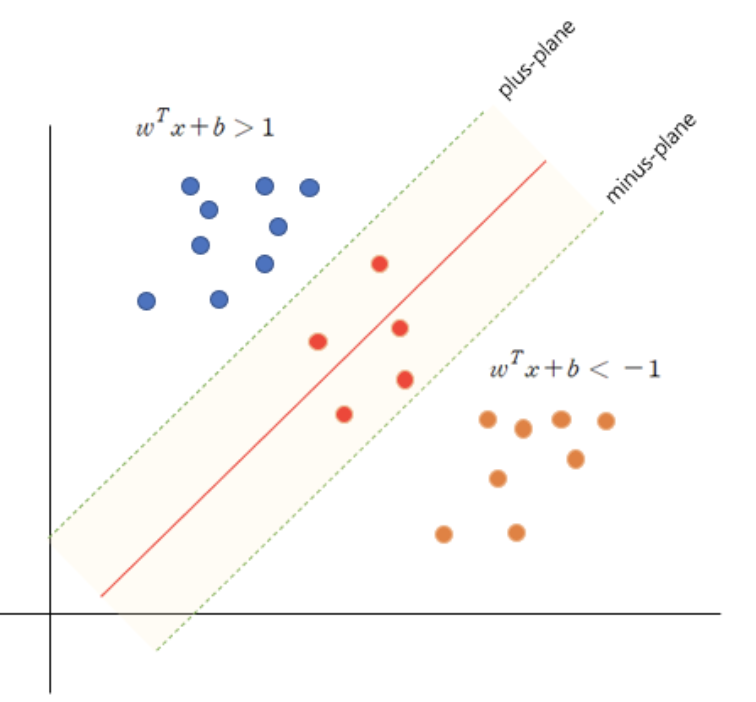
 바로 앞에서 자세히 다루지는 않았지만 hinge 함수 (hinge loss)가 이와 관련이 있다.
 hinge loss는 다음과 같이 쓴다
 loss = max{0, Y(예측값) x y(실제값)}
 즉 위의 그림과 같이 예측값과 실제값이 같으면 무조건 1이상이 나오기 때문에 1미만의 값을 갖는다면 
 해당 관측값은 마진 내에 존재한다는 것이다.
 즉 여기서의 조건은 로스가 없다. 즉 모든 샘플에 대해 Y*y가 1보다 커야한다는 것이다!

 소프트 마진 분류기의 목적 함수를 구성하려면 각 샘플에 대해 슬랙 변수르르 도입해야 한다.(여기서는 제타)
 제타는 i번째 샘플이 얼마나 마진을 위반할지 정한다.
 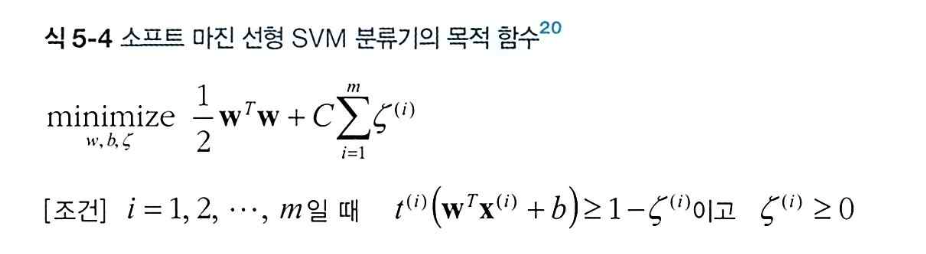
 여기서 약간의 트레이드-오프가 있는데 마진을 크게 하기 위해 1/2W^TW를 작게 하는 것과 마진 오류를 최소화하기 위해 가능한 
 한 슬랙 변수의 값을 작게 만드는 것...이렇게 목표가 상충된다.
 이 상충되는 목표를 조정하기 위해 하이퍼파라미터 C가 등장한다.
 이 파라미터는 두 목표 사이의 트레이드오프를 정의한다.
 일종의 제약의 역할을 한다고 보면 된다.
 C가 작아지면 모델이 단순해지고 마진 오류는 늘어난다(규제가 강해진다!)
 C가 커지면 모델이 복잡해지고 마진 오류는 줄어든다.
 이렇게 제약이 있는 최적화 문제를 primal problem 즉 원문제라고 불른다.
 이는 dual problem이라고 하는 쌍대 문제로 바꿔 표현할 수 있다.
 LinearSVC에서 매개변수 dual이 바로 이것을 조정하는 매개변수이다. dual이 true면 (기본) 쌍대 문제를 푼다.
 false면 원문제를 푸는 것이다.
 LinearSVC에서는 dual=True일 때, 좌표경사하강법을 사용하고, False일 때 뉴턴메서드를 사용한다.
 SVC, SVR 클래스는 항상 쌍대 문제를 푼다. 원문제의 해는 갖고 있지 않다. 이는 항상 커널 트릭을 사용하기 때문이다.
 https://m.blog.naver.com/60yearsago/185314025 -> 원문제와 쌍대문제 참고!!

 일반적으로 쌍대 문제 해는 원문제 해의 하한값이지만 어떤 조건하에서는 원문제와 똑같은 해를 제공한다.
 그리고 SVM 문제도 원문제와 똑같은 해를 제공하기 때문에 원 문제나 쌍대 문제 둘 중 아무거나 선택해서 풀어도 되는 것이다.
 훈련 샘플 수가 특성 개수보다 작을 때 원 문제보다 쌍대 문제를 푸는 것이 더 빠르다.
 더 중요한 것은 원 문제에서는 적용이 안되는 커널 트릭을 가능하게 한다.
 그렇다면 커널 트릭은 대체 뭘까??

 ## 커널 트릭, 커널 SVM
 2차원 데이터셋에 2차 다항식 변환을 적용하고 선형 SVM 분류기를 변환된 이 훈련 세트에 적용한다고 하자.
 이 2차 다항식 변환에 쓰이는 2차 다항식 매핑 함수 파이가 있다고 해보자.
 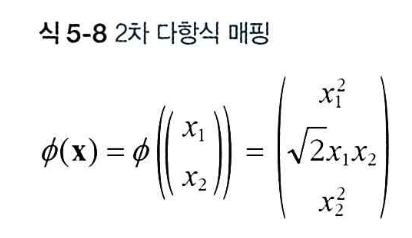
 변환된 벡터는 2차원이 아니고 3차원이 된다.
 만약 2개의 2차원 벡터 a와 b에 2차 다항식 매핑을 적용한 다음 변환된 벡터로 내적을 하면 어떻게 될까?

 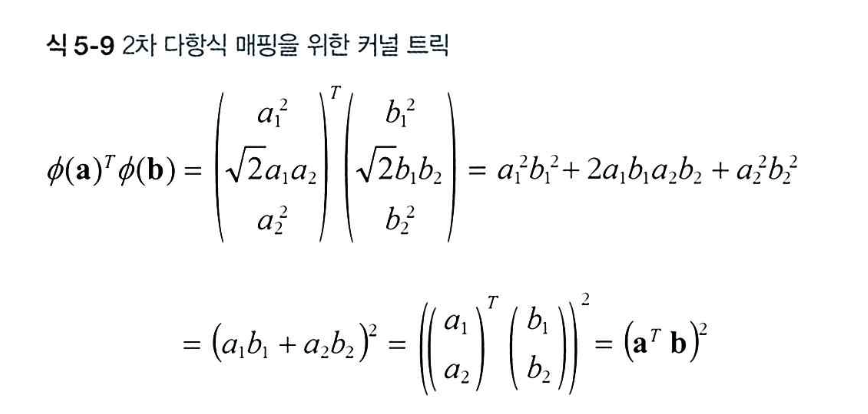
 놀랍게도 원래의 벡터의 내적의 제곱과 같을 것이다.
 이런 파이와 같은 함수를 커널 함수라고 부른다.
 이런 커널 함수의 장점은 위에서 다항식 매핑을 위한 커널 트릭에서 보았듯이
 직접 feature space를 늘리지 않아도 그냥 결과상의 벡터를 내적하고 제곱하면 특성을 늘린 결과가 나온다는 것이다!
 대표적으로 사이킷런에서 제공하는 커널은 다음과 같다.
 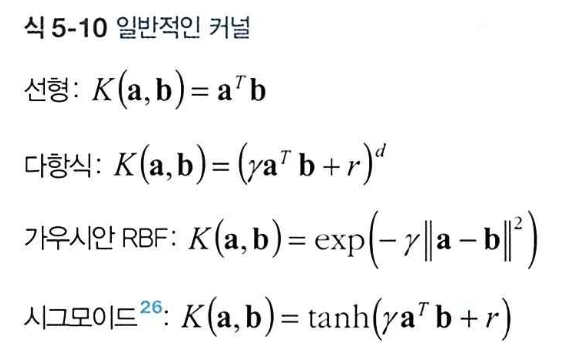
 위에서 봤던 커널은 2차 다항식 커널이다.
 
 
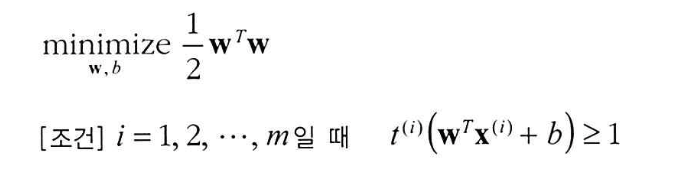